In [1]:
%matplotlib inline
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py

## Generating Data

In [2]:
highest_coeff = 15
bounds = [50e-9]*(highest_coeff-1) #piston not included

N = 10 #number of examples

wfe_array = generate_wfe_array(bounds,N)
print(wfe_array.shape)
print(wfe_array[:,:3])

(14, 10)
[[ 1.11048007e-08  4.59262993e-08  3.32772834e-08]
 [ 1.25660982e-08 -1.47686361e-08 -1.39683549e-08]
 [ 2.83425365e-08  7.33169886e-11  2.49813325e-08]
 [ 3.08952761e-08  2.70319408e-08  2.06909556e-08]
 [-1.71257130e-08  3.10635164e-08  3.73001055e-08]
 [-1.13311518e-08  1.94622041e-08  3.16434183e-08]
 [-8.48281500e-09  4.34717473e-08  4.86119787e-08]
 [ 2.99351074e-08 -3.07059176e-08  4.99038418e-08]
 [-1.63935665e-08  3.52450502e-08 -3.64949655e-08]
 [-1.01393502e-08 -1.86555168e-08 -8.41923110e-09]
 [ 3.10615592e-09  4.67210686e-08 -4.26574689e-08]
 [-1.34043606e-08  2.34580164e-09 -1.70612577e-08]
 [-2.96314523e-08  3.58945188e-08  2.93238078e-09]
 [ 5.20294300e-09  1.17303568e-08  1.96184623e-08]]


In [3]:
file_out = 'test.hdf5'
#size of output images is 64*oversample square, so oversample=2 gives 128x128 arrays
#oversample=2 works well and doesn't take too long
#'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.
simulate_multiple_llowfs(wfe_array,file_out,oversample=2,wavelength=632e-9*u.m,coronagraph='vortex')

## Reading Data

In [4]:
with h5py.File('test.hdf5', 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(images.shape)

(14, 10)
(128, 128, 10)


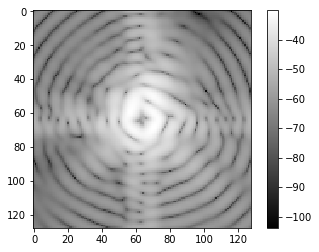

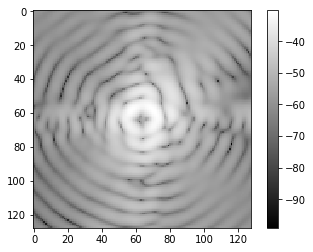

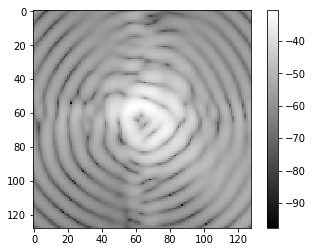

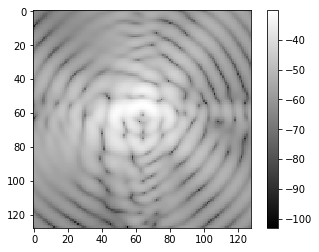

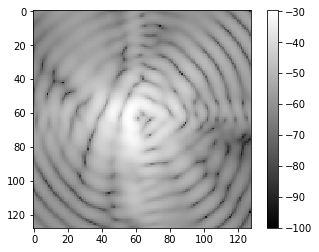

In [5]:
for i in range(5):
    plt.figure()
    plt.imshow(10*np.log10(images[:,:,i]),cmap='gray')
    plt.colorbar()